In [53]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.patches as mpatches

import calendar

# Carga de Datos

In [19]:
ssem_2014 = pd.read_csv('properties/properati-AR-2015-01-01-properties-sell-six_months.csv')

psem_2015 = pd.read_csv('properties/properati-AR-2015-06-01-properties-sell-six_months.csv')
ssem_2015 = pd.read_csv('properties/properati-AR-2015-12-01-properties-sell-six_months.csv')

en_16 = pd.read_csv('properties/properati-AR-2016-01-01-properties-sell.csv')
fe_16 = pd.read_csv('properties/properati-AR-2016-02-01-properties-sell.csv')
ma_16 = pd.read_csv('properties/properati-AR-2016-03-01-properties-sell.csv')
ab_16 = pd.read_csv('properties/properati-AR-2016-04-01-properties-sell.csv')
my_16 = pd.read_csv('properties/properati-AR-2016-05-01-properties-sell.csv')
jn_16 = pd.read_csv('properties/properati-AR-2016-06-01-properties-sell.csv')
jl_16 = pd.read_csv('properties/properati-AR-2016-07-01-properties-sell.csv')
ag_16 = pd.read_csv('properties/properati-AR-2016-08-01-properties-sell.csv')
se_16 = pd.read_csv('properties/properati-AR-2016-09-01-properties-sell.csv')
oc_16 = pd.read_csv('properties/properati-AR-2016-10-01-properties-sell.csv')
nv_16 = pd.read_csv('properties/properati-AR-2016-11-01-properties-sell.csv')
dc_16 = pd.read_csv('properties/properati-AR-2016-12-01-properties-sell.csv')
psem_2016 = pd.concat([en_16, fe_16, ma_16, ab_16, my_16, jn_16]).drop_duplicates('properati_url')
ssem_2016 = pd.concat([jl_16, ag_16, se_16, oc_16, nv_16, dc_16]).drop_duplicates('properati_url')
semestres = pd.concat([ssem_2014, psem_2015, ssem_2015, psem_2016, ssem_2016]).drop_duplicates('properati_url')

# Top 5  de barrios con precios por propiedad en venta mas caros del segundo semestre del 2014 hasta el segundo semestre de 2016 inclusive en USD

In [23]:
top_barrios = semestres.loc[semestres.state_name.str.contains('Capital Federal') & (semestres.place_name.str.contains('Capital Federal') == False) \
                   & (semestres.price_aprox_usd > 0),['place_name', 'price_aprox_usd']]
top_barrios.dropna(inplace=True)
top_barrios = top_barrios.groupby('place_name').agg([np.mean,np.size])
top_barrios = top_barrios.loc[top_barrios[('price_aprox_usd', 'size')]>100,:].sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
top_barrios.drop([('price_aprox_usd', 'size')], axis = 1, inplace=True)
top_barrios

,price_aprox_usd
,mean
place_name,
Palermo Chico,956455.912590
Puerto Madero,876851.787336
Retiro,482741.726921
Recoleta,414885.998009
Belgrano,375500.376540


# Promedio de precios en USD en el 2do semestre 2014 segun top 5

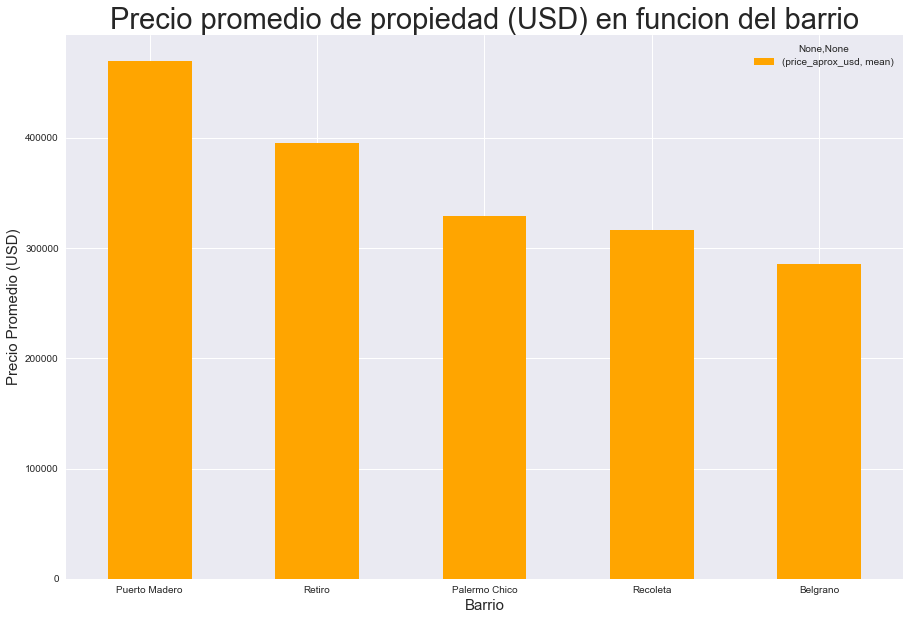

In [35]:
ssem_2014_pr = ssem_2014.loc[(ssem_2014.place_name.str.contains('Palermo Chico') | \
                             ssem_2014.place_name.str.contains('Puerto Madero') | \
                             ssem_2014.place_name.str.contains('Retiro') | \
                             ssem_2014.place_name.str.contains('Recoleta') | \
                             ssem_2014.place_name.str.contains('Belgrano') ) \
                            & (ssem_2014.price_aprox_usd > 0) & ssem_2014.state_name.str.contains('Capital Federal'), \
                             ['place_name', 'price_aprox_usd']]
ssem_2014_pr.dropna(inplace=True)
ssem_2014_pr = ssem_2014_pr.groupby('place_name').agg([np.mean])
ssem_2014_pr = ssem_2014_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = ssem_2014_pr.plot(kind='bar', figsize =(15,10), color='orange', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)

# Promedio de precios en USD por barrio 1er semestre 2015

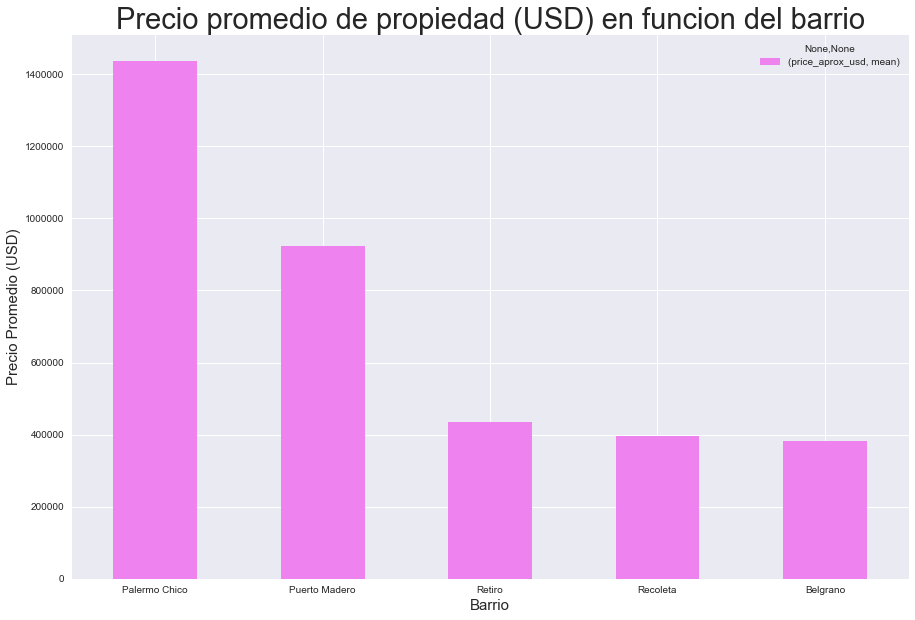

In [34]:
psem_2015_pr = psem_2015.loc[(psem_2015.place_name.str.contains('Palermo Chico') | \
                             psem_2015.place_name.str.contains('Puerto Madero') | \
                             psem_2015.place_name.str.contains('Retiro') | \
                             psem_2015.place_name.str.contains('Recoleta') | \
                             psem_2015.place_name.str.contains('Belgrano') ) \
                             & (psem_2015.price_aprox_usd > 0) & psem_2015.state_name.str.contains('Capital Federal'), \
                             ['place_name', 'price_aprox_usd']]
psem_2015_pr.dropna(inplace=True)
psem_2015_pr = psem_2015_pr.groupby('place_name').agg([np.mean])
psem_2015_pr = psem_2015_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = psem_2015_pr.plot(kind='bar', figsize =(15,10), color='violet', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)

# Promedio de precios en USD por barrio 2do semestre 2015

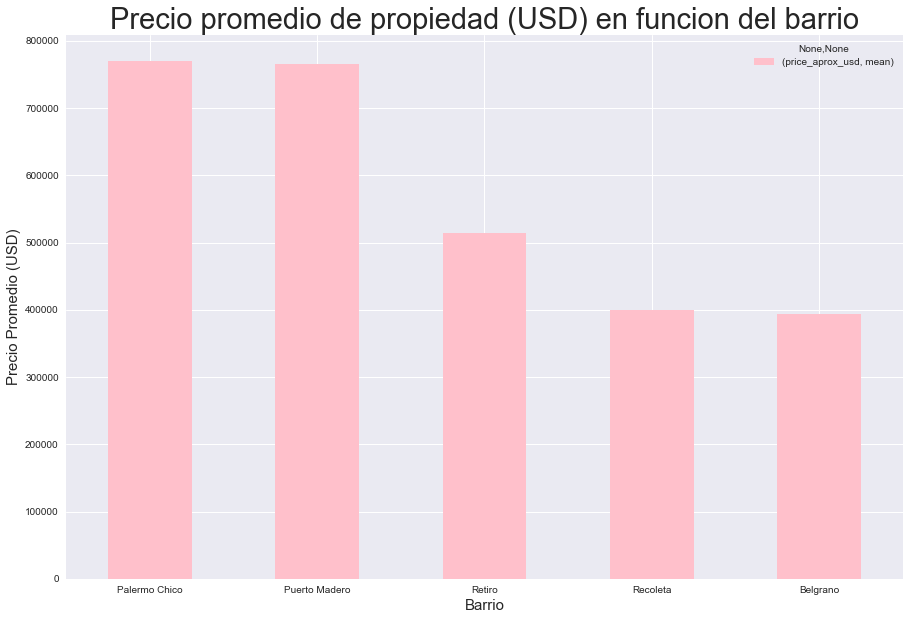

In [38]:
ssem_2015_pr = ssem_2015.loc[(ssem_2015.place_name.str.contains('Palermo Chico') | \
                             ssem_2015.place_name.str.contains('Puerto Madero') | \
                             ssem_2015.place_name.str.contains('Retiro') | \
                             ssem_2015.place_name.str.contains('Recoleta') | \
                             ssem_2015.place_name.str.contains('Belgrano') ) \
                             & (ssem_2015.price_aprox_usd > 0) & ssem_2015.state_name.str.contains('Capital Federal'), \
                             ['place_name', 'price_aprox_usd']]
ssem_2015_pr.dropna(inplace=True)
ssem_2015_pr = ssem_2015_pr.groupby('place_name').agg([np.mean])
ssem_2015_pr = ssem_2015_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = ssem_2015_pr.plot(kind='bar', figsize =(15,10), color='pink', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)

# Promedio de precios en USD por barrio 1er semestre 2016

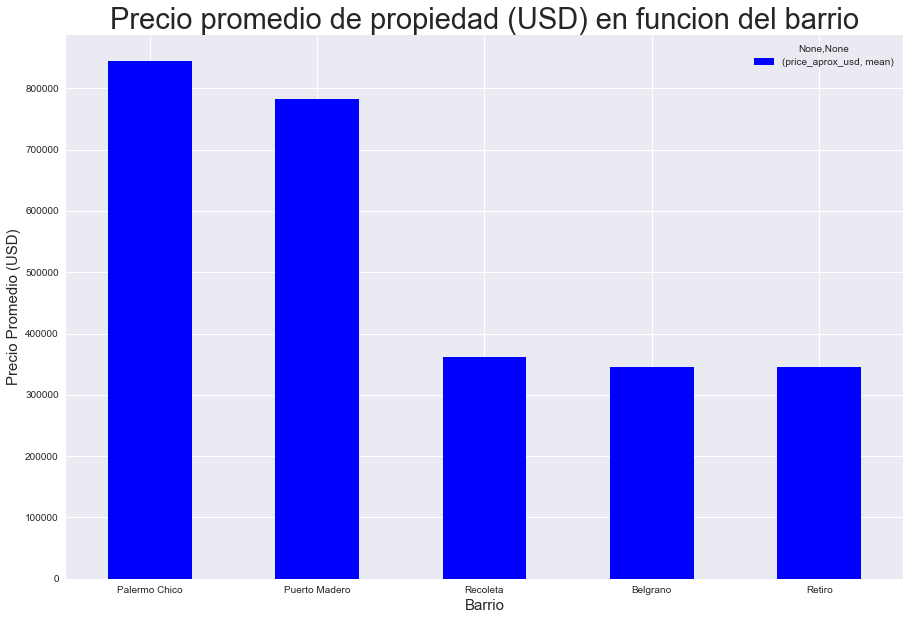

In [37]:
psem_2016_pr = psem_2016.loc[(psem_2016.place_name.str.contains('Palermo Chico') | \
                             psem_2016.place_name.str.contains('Puerto Madero') | \
                             psem_2016.place_name.str.contains('Retiro') | \
                             psem_2016.place_name.str.contains('Recoleta') | \
                             psem_2016.place_name.str.contains('Belgrano') ) \
                             & (psem_2016.price_aprox_usd > 0) & psem_2016.state_name.str.contains('Capital Federal'), \
                             ['place_name', 'price_aprox_usd']]
psem_2016_pr.dropna(inplace=True)
psem_2016_pr = psem_2016_pr.groupby('place_name').agg([np.mean])
psem_2016_pr = psem_2016_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = psem_2016_pr.plot(kind='bar', figsize =(15,10), color='b', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)

# Promedio de precio en USD por barrio 2do semestre 2016

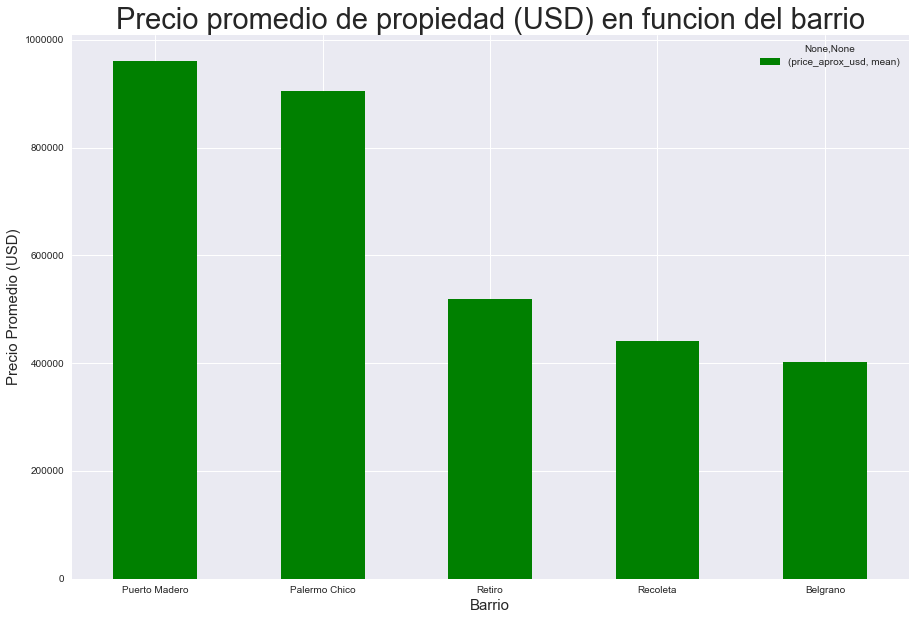

In [36]:
ssem_2016_pr = ssem_2016.loc[(ssem_2016.place_name.str.contains('Palermo Chico') | \
                             ssem_2016.place_name.str.contains('Puerto Madero') | \
                             ssem_2016.place_name.str.contains('Retiro') | \
                             ssem_2016.place_name.str.contains('Recoleta') | \
                             ssem_2016.place_name.str.contains('Belgrano') ) \
                             & (ssem_2016.price_aprox_usd > 0) & ssem_2016.state_name.str.contains('Capital Federal'), \
                             ['place_name', 'price_aprox_usd']]
ssem_2016_pr.dropna(inplace=True)
ssem_2016_pr = ssem_2016_pr.groupby('place_name').agg([np.mean])
ssem_2016_pr = ssem_2016_pr.sort_values(('price_aprox_usd', 'mean'), ascending = False).head(5)
fig1 = ssem_2016_pr.plot(kind='bar', figsize =(15,10), color='g', rot = 0)
fig1.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 29)
fig1.set_xlabel('Barrio', size = 15)
fig1.set_ylabel('Precio Promedio (USD)', size = 15)

# Precio en funcion del tipo de propiedad en venta

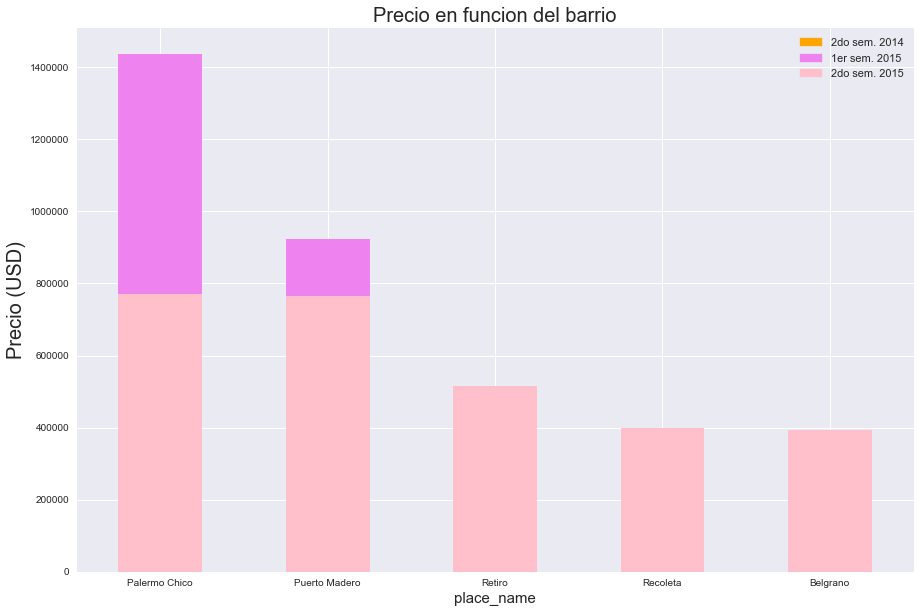

In [61]:
#POR VERSE

f = plt.figure()
plt.xlabel('Barrio', fontsize=15);
plt.ylabel('Precio (USD)', fontsize=20);
plt.title('Precio en funcion del barrio', fontsize=20);

ax1 = ssem_2014_pr.plot(kind='bar', figsize =(15,10), color='orange', rot = 0, ax=f.gca())
ax1_patch=mpatches.Patch(color='orange', label='2do sem. 2014')
ax2 = psem_2015_pr.plot(kind='bar', figsize =(15,10), color='violet', rot = 0, ax=f.gca())
ax2_patch=mpatches.Patch(color='violet', label='1er sem. 2015')
ax3 = ssem_2015_pr.plot(kind='bar', figsize =(15,10), color='pink', rot = 0, ax=f.gca())
ax3_patch=mpatches.Patch(color='pink', label='2do sem. 2015')
#ax4 = grouped4['mean'].plot(linewidth=5.0,figsize=(16,8),color='#7880B5', ax=f.gca())
#ax4_patch=mpatches.Patch(color='#7880B5', label='Promedio en Zona Sur (G.B.A)', lw=3.0)

plt.legend(handles=[ax1_patch,ax2_patch,ax3_patch], fontsize=11.0)
plt.show()